In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pydicom
import os
import pylidc as pl
import SimpleITK as sitk
# skimage image processing packages
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
img_path = "../COVID-19/EXACT09/Training/CASE01/1094315"

In [3]:
lung = pydicom.dcmread(img_path)

In [4]:
print(lung)#view the content of the data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.54044.30000005021717375151500002298
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_354'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.54044.30000005021717375151500002298
(0008, 0020) Study Dat

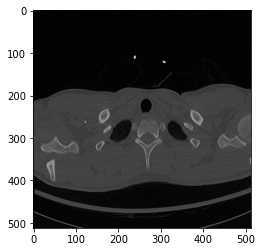

In [5]:
slice = lung.pixel_array
slice[slice == -2000] = 0 #update the intensity values of -2000 with 0 because they are the pixels that fall outside of the scanner bounds
plt.imshow(slice, cmap=plt.cm.gray)

In [6]:
ann_path = "../COVID-19/EXACT09/AirwayAnnotation/airways_EXACTtrain/CASE01.mhd"

In [7]:
def plot_3d(image):
    xx, yy = np.meshgrid(np.linspace(0,1,512), np.linspace(0,1,512))
    X=xx
    Y=yy
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes_lewiner(p)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    #ax.contourf(X,Y,slice,zdir='z',offset=0, cmap=plt.cm.gray)
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    #ax.plot_surface(slice[0],slice[1],0, cmap=plt.cm.gray)
    plt.show()

/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  # Remove the CWD from sys.path while we load stuff.


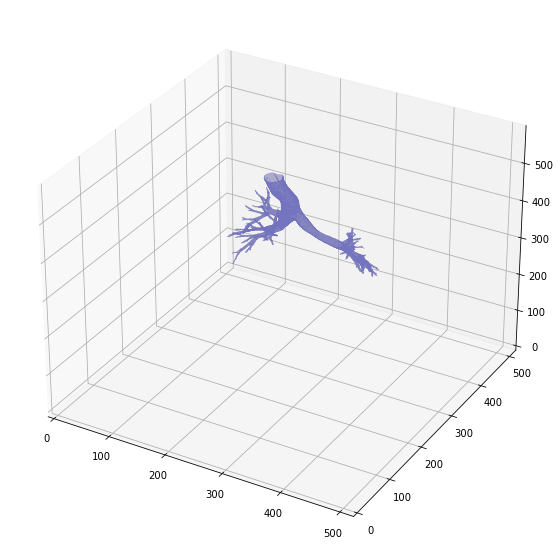

In [8]:
ann = sitk.ReadImage(ann_path)
ann_img = sitk.GetArrayFromImage(ann)
plot_3d(ann_img)

In [9]:
layer534 = ann_img[533,:,:]

In [10]:
def overlay(img, lbl):
    img = (img-np.amin(img))/(np.amax(img)-np.amin(img)) #512*512 0-1
    lbl = (lbl-np.amin(lbl))/(np.amax(lbl)-np.amin(lbl)) #512*512 0-1
   
    arr = np.zeros([512,512,3])
    temp = img + lbl
    arr[:,:,0]=img*((img+lbl)<1)+lbl
    arr[:,:,1]=img
    arr[:,:,2]=img
   
    return arr

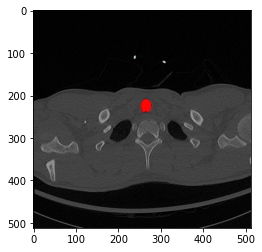

In [12]:
plt.imshow(overlay(slice,layer534), cmap=plt.cm.gray)